In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os 
import cv2

In [3]:
import glob as gb

In [4]:
import tensorflow as tf

In [47]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tqdm import tqdm
# from sklearn.metrics import classification_report, precision_recall_score_support
from sklearn.metrics import precision_recall_fscore_support


In [6]:
os.getcwd()

'd:\\InnovionRay_team\\Innovisionray_team\\InnoVisionRay\\Amit\\AI_Diploma\\AI Engineering\\Computer_Vision\\CNN_Project\\CNN_project_qt5'

In [7]:
train_path  = 'D:\InnovionRay_team\Innovisionray_team\InnoVisionRay\Amit\AI_Diploma\AI Engineering\Computer_Vision\CNN_Project\CNN_project_qt5\src\Data\seg_train\seg_train'
test_path = 'D:\InnovionRay_team\Innovisionray_team\InnoVisionRay\Amit\AI_Diploma\AI Engineering\Computer_Vision\CNN_Project\CNN_project_qt5\src\Data\seg_test\seg_test'
pred_path = 'D:\InnovionRay_team\Innovisionray_team\InnoVisionRay\Amit\AI_Diploma\AI Engineering\Computer_Vision\CNN_Project\CNN_project_qt5\src\Data\seg_pred\seg_pred'


<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\I'
C:\Users\AMIT\AppData\Local\Temp\ipykernel_17204\3697068516.py:1: SyntaxWarning: invalid escape sequence '\I'
  train_path  = 'D:\InnovionRay_team\Innovisionray_team\InnoVisionRay\Amit\AI_Diploma\AI Engineering\Computer_Vision\CNN_Project\CNN_project_qt5\src\Data\seg_train\seg_train'
C:\Users\AMIT\AppData\Local\Temp\ipykernel_17204\3697068516.py:2: SyntaxWarning: invalid escape sequence '\I'
  test_path = 'D:\InnovionRay_team\Innovisionray_team\InnoVisionRay\Amit\AI_Diploma\AI Engineering\Computer_Vision\CNN_Project\CNN_project_qt5\src\Data\seg_test\seg_test'
C:\Users\AMIT\AppData\Local\Temp\ipykernel_17204\3697068516.py:3: SyntaxWarning: invalid escape sequence '\I'
  pred_path = 'D:\Innovi

In [8]:
def count_images_in_folders(base_path, description):
    
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        images = gb.glob(os.path.join(folder_path,'*.jpg'))
        print(f" For {description} data, found {len(images)} images in folder  {folder}" )
    


In [9]:
count_images_in_folders(train_path,"training")

 For training data, found 2191 images in folder  buildings
 For training data, found 2271 images in folder  forest
 For training data, found 2404 images in folder  glacier
 For training data, found 2512 images in folder  mountain
 For training data, found 2274 images in folder  sea
 For training data, found 2382 images in folder  street


In [10]:
count_images_in_folders(test_path,"test")

 For test data, found 437 images in folder  buildings
 For test data, found 474 images in folder  forest
 For test data, found 553 images in folder  glacier
 For test data, found 525 images in folder  mountain
 For test data, found 510 images in folder  sea
 For test data, found 501 images in folder  street


In [11]:
code = {'buildings':0, 'forest': 1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
def get_code(n):
    for x,y in code.items():
        if n == y:
            return x
        


In [12]:
get_code(0)


'buildings'

In [13]:
def get_image_size(image_path, is_subfolder = False):
    sizes = []
    if is_subfolder:
        for folder in os.listdir(image_path):
            images = gb.glob(pathname = str(image_path + '/' + folder + '/*.jpg'))
            for img in images:
                image =plt.imread(img)
                sizes.append(image.shape)
    else:
        files = gb.glob(pathname = str(image_path + '/*.jpg'))
        for file in files:
            image = plt.imread(file)
            sizes.append(image.shape)
    return pd.Series(sizes).value_counts()
                

In [14]:
train_sizes = get_image_size(train_path, is_subfolder=True)
test_sizes = get_image_size(test_path, is_subfolder=True)
pred_sizes = get_image_size(pred_path, is_subfolder=False)


In [15]:
def load_images(image_path, code, resize_shape=(100,100),is_subfolder = True):
    
    x_data = []
    y_data = []
    
    
    if is_subfolder:
        for folder in os.listdir(image_path):
            folder_path = os.path.join(image_path, folder)
            images = gb.glob(pathname = os.path.join(folder_path,'*.jpg'))
            for img_path in images:
                image = plt.imread(img_path)
                image_resize = cv2.resize(image, resize_shape)
                x_data.append(image_resize)
                y_data.append(code[folder])
    else:
        images = gb.glob(pathname = os.path.join(image_path,'*.jpg'))
        for img_path in images:
            image = cv2.imread(img_path)
            image_resize = cv2.resize(image, resize_shape)
            x_data.append(image_resize)
        y_data = None
        
        
    return np.array(x_data), np.array(y_data)

    

In [16]:
x_train , y_train = load_images(train_path, code , resize_shape=(100,100), is_subfolder = True)
x_test , y_test = load_images(test_path, code , resize_shape=(100,100), is_subfolder = True)
x_pred , _  = load_images(pred_path, code= None , resize_shape=(100,100), is_subfolder = False)

In [17]:
print(f"x_train shape :{x_train.shape}, y_train shape : {y_train.shape}")
print(f"x_test shape :{x_test.shape}, y_train shape : {y_test.shape}")
print(f"x_pred shape :{x_pred.shape}")

x_train shape :(14034, 100, 100, 3), y_train shape : (14034,)
x_test shape :(3000, 100, 100, 3), y_train shape : (3000,)
x_pred shape :(7301, 100, 100, 3)


In [18]:
x_train = np.array(x_train)[:500]
x_test = np.array(x_test)[:500]

y_train = np.array(y_train)[:500]
y_test = np.array(y_test)[:500]
x_pred = np.array(x_pred)

In [19]:
print(x_train.shape)
print(x_test.shape)


print(y_train.shape)
print(y_train.shape)

print(x_pred.shape)

(500, 100, 100, 3)
(500, 100, 100, 3)
(500,)
(500,)
(7301, 100, 100, 3)


In [ ]:
from tensorflow import keras


In [28]:
#implement same as vgg16
own_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(200, activation='tanh', kernel_size=(3,3), padding='same', input_shape=(100,100,3)),
    tf.keras.layers.Conv2D(180, activation='tanh', kernel_size=(3,3), padding='same'),
    tf.keras.layers.Conv2D(160, activation='tanh', kernel_size=(3,3), padding='same'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(140, activation='tanh', kernel_size=(3,3), padding='same'),
    tf.keras.layers.Conv2D(120, activation='tanh', kernel_size=(3,3), padding='same'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(100, activation='tanh', kernel_size=(3,3), padding='same'),
    tf.keras.layers.Conv2D(80, activation='tanh', kernel_size=(3,3), padding='same'),
    tf.keras.layers.Conv2D(60, activation='tanh', kernel_size=(3,3), padding='same'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(140, activation='tanh', kernel_size=(3,3), padding='same'),
    tf.keras.layers.Conv2D(120, activation='tanh', kernel_size=(3,3), padding='same'),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(50, activation='relu', kernel_size=(3,3), padding='same'),
    tf.keras.layers.Conv2D(40, activation='relu', kernel_size=(3,3), padding='same'),
    tf.keras.layers.Conv2D(40, activation='relu', kernel_size=(3,3), padding='same'),
    tf.keras.layers.Conv2D(30, activation='relu', kernel_size=(3,3), padding='same'),

    tf.keras.layers.Conv2D(20, activation='relu', kernel_size=(3,3), padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='tanh'),
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [29]:
own_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 100, 100, 200)  │         5,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 100, 100, 180)  │       324,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 100, 100, 160)  │       259,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 50, 50, 160)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 50, 50, 140)    │       201,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 50, 50, 120)    │       151,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 25, 25, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 25, 25, 100)    │       108,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 25, 25, 80)     │        72,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 25, 25, 60)     │        43,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 12, 12, 140)    │        75,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 12, 12, 120)    │       151,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 120)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 6, 6, 50)       │        54,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 6, 6, 40)       │        18,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 6, 6, 40)       │        14,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 6, 6, 30)       │        10,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 6, 6, 20)       │         5,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 720)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 50)             │        36,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           186 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,533,246 (5.85 MB)

 Trainable params: 1,533,246 (5.85 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
own_model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [38]:
model_save_path='D:/InnovionRay_team/Innovisionray_team/InnoVisionRay/Amit/AI_Diploma/AI Engineering/Computer_Vision/CNN_Project/CNN_project_qt5/src/Data/best.h5'
# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    model_save_path,
    monitor='val_loss',  # Monitor validation loss; change to 'val_accuracy' if desired
    save_best_only=True,  # Save only the best model
    mode='min',  # 'min' for loss, 'max' for accuracy
    verbose=1  # Verbosity mode, 1 = save messages
)

# Train the model with the ModelCheckpoint callback
model = own_model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),  # Make sure to include validation data
    epochs=1,
    batch_size=64,
    verbose=1,
    callbacks=[checkpoint]  # Pass the checkpoint callback here
)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28s/step - accuracy: 0.5836 - loss: 1.1690 
Epoch 1: val_loss improved from inf to 0.86154, saving model to D:/InnovionRay_team/Innovisionray_team/InnoVisionRay/Amit/AI_Diploma/AI Engineering/Computer_Vision/CNN_Project/CNN_project_qt5/src/Data/best.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 289s 36s/step - accuracy: 0.6105 - loss: 1.1099 - val_accuracy: 0.8740 - val_loss: 0.8615


In [39]:
loss, accuracy = own_model.evaluate(x_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.9785 - loss: 0.1709


In [40]:
print("my_loss is  ",loss)
print("my_acc is  ",accuracy)

my_loss is   0.8615354299545288
my_acc is   0.8740000128746033


In [41]:
y_result = own_model.predict(x_pred)

229/229 ━━━━━━━━━━━━━━━━━━━━ 727s 3s/step


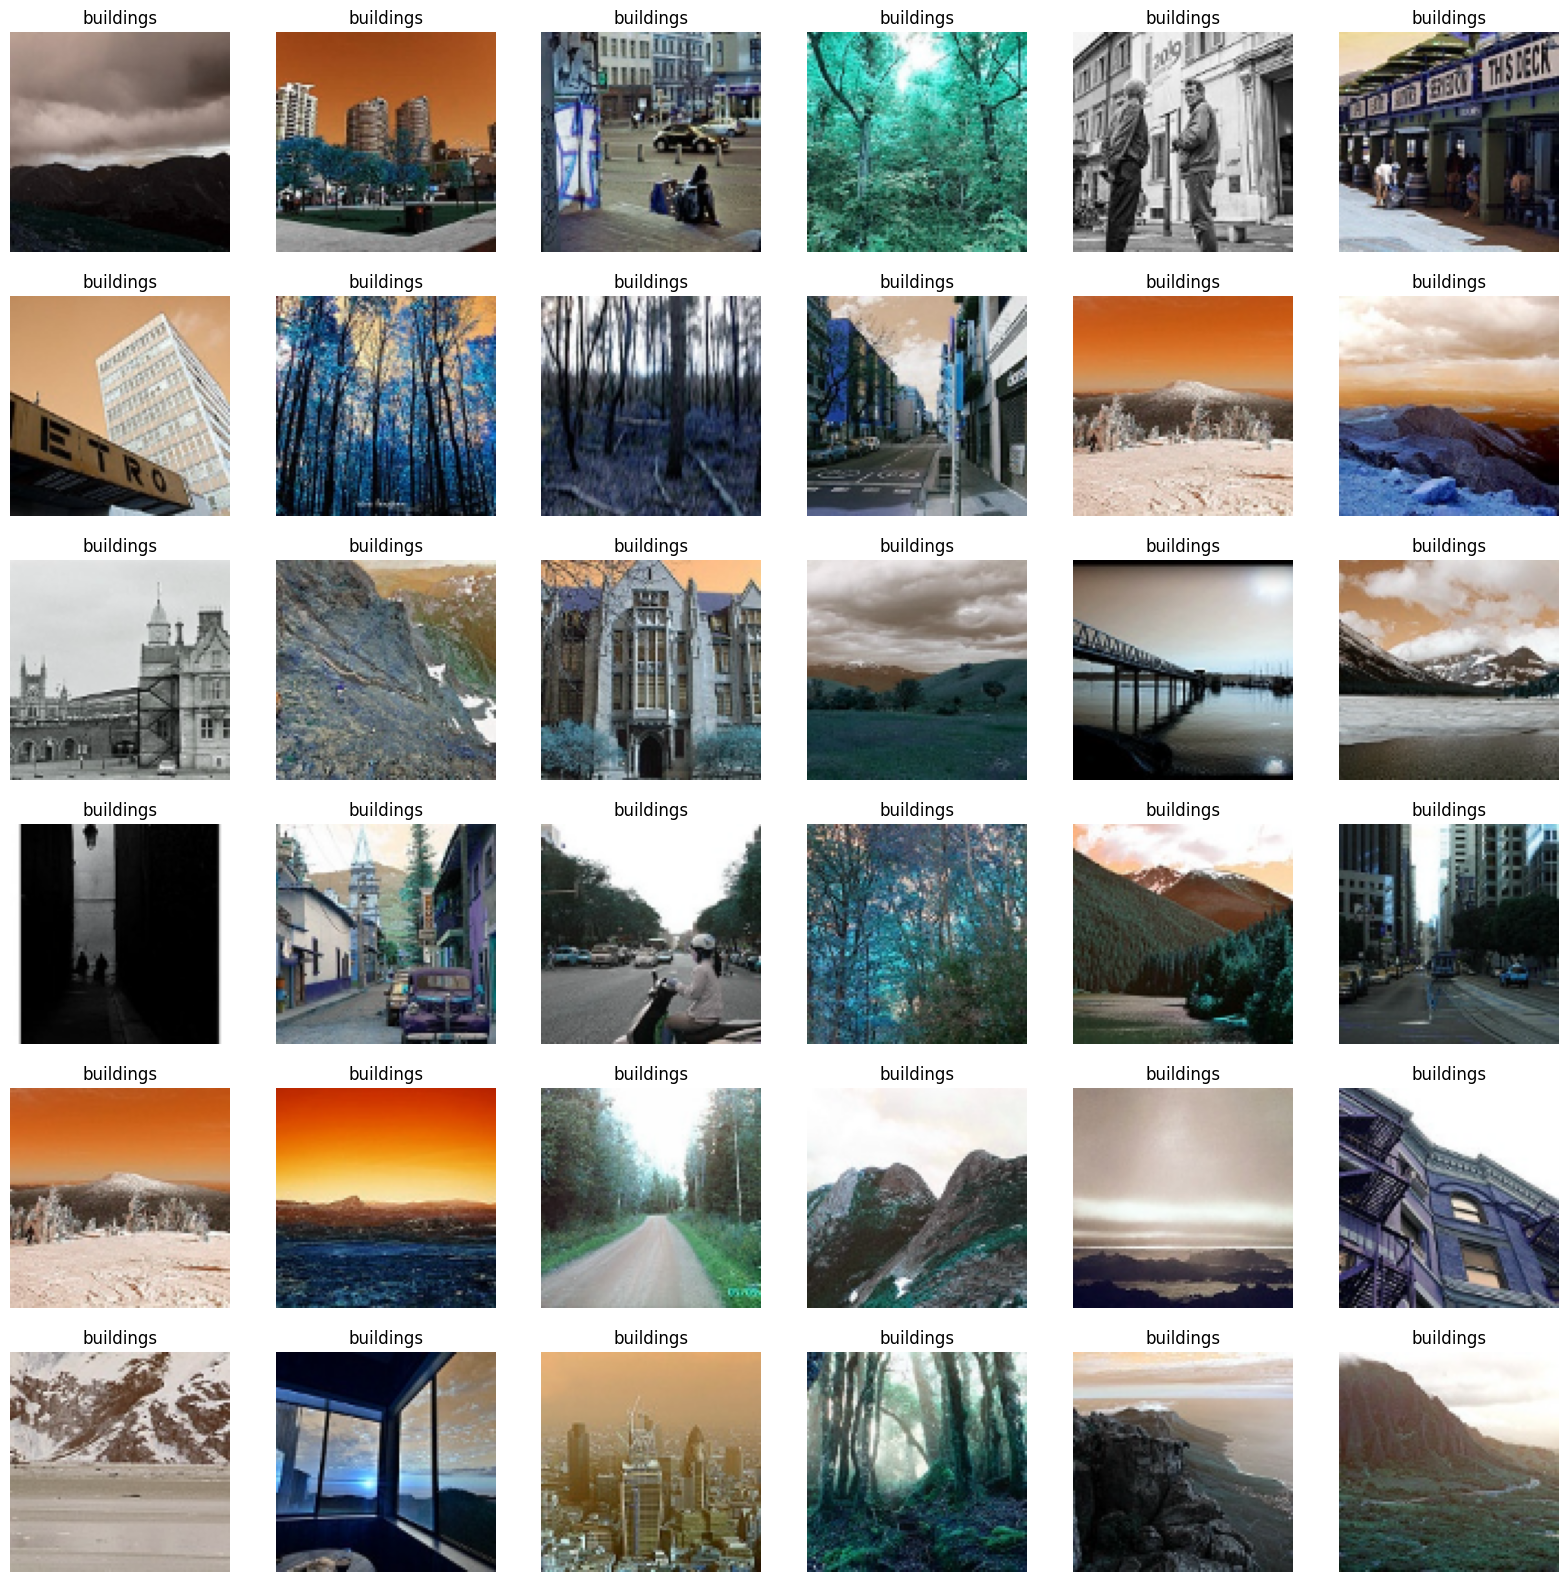

In [42]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_pred[i])
    plt.axis('off')
    plt.title(get_code(np.argmax(y_result[i])))

In [48]:
y_pred = own_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

labels = list(code.values())
target_names = list(code.keys())
report = classification_report(y_test, y_pred_classes, labels=labels, target_names=target_names)

print(report)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, labels=labels, target_names=target_names)

print(report)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, labels=labels, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1_score:.4f}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step
              precision    recall  f1-score   support

   buildings       0.87      1.00      0.93       437
      forest       0.00      0.00      0.00        63
     glacier       0.00      0.00      0.00         0
    mountain       0.00      0.00      0.00         0
         sea       0.00      0.00      0.00         0
      street       0.00      0.00      0.00         0

    accuracy                           0.87       500
   macro avg       0.15      0.17      0.16       500
weighted avg       0.76      0.87      0.82       500

              precision    recall  f1-score   support

   buildings       0.87      1.00      0.93       437
      forest       0.00      0.00      0.00        63
     glacier       0.00      0.00      0.00         0
    mountain       0.00      0.00      0.00         0
         sea       0.00      0.00      0.00         0
      street       0.00      0.00      0.00         0

    accuracy                          

C:\Users\AMIT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AMIT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AMIT\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 